# Transfer Function in the Frequency Domain -- Frequency Response
### *Chapter 4 Section 5* -- AC Steady State Analysis

## Drill Problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Problem 1
1. Draw the amplitude response in logarithmic scale (Bode plot) for the transfer function
$$ K(s) = \frac{A+Bs}{C+Ds}$$
    and the following combinations of its coefficients:
    1. $A=0.1$, $B=0$, $C=1$, $D=10$; 
    2. $A=1$, $B=0.1$, $C=0$, $D=1$; 
    3. $A=0$, $B=10$, $C=1$, $D=10$.   

$$ K_\mathrm{dB}(\omega) = 20\log\Gamma + 10\log\big(1 + \omega^2 T_{L1}^2\big) - 10\log\big(1+\omega^2 T_{M1}^2\big)$$

where,  

$$ \Gamma = \frac{A}{C}\quad\quad T_{L1} = \frac{B}{A}\quad\quad T_{M1} = \frac{D}{C}$$

In the **case of A**:  

$$ \Gamma = 0.1 \quad\quad T_{L1} = 0\quad\quad T_{M1} = 10$$

Thus,  

$$ K_\mathrm{dB}(\omega) = -20 - 10\log\big(1 + 100\omega^2\big)$$

Thus cutoff frequency is:  

$$ \omega_\mathrm{c} = \frac{1}{T_{M1}} = 0.1\,\mathrm{rad}/\mathrm{s}$$

The radian frequency $\omega$ as a function of one interval on the $\omega$-axis  at the logarithmic scale is given by:  

$$ \omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^{x-3}\,\mathrm{rad}/\mathrm{s}$$

The *uncorrected* Bode plot is given by $f(x)$, where,  

$$ f(x) = -20 \quad\quad\text{for }\; \omega \le \omega_\mathrm{c}$$

Note that:  

$$ \omega \le \omega_\mathrm{c} \quad\implies\quad x-3 \le -1 \quad\implies\quad x \le 2$$

And,  

$$ f(x) = -40 - 20\log10^{x-3} = -40 - 20(x-3) = 20 - 20x \quad\quad\text{for }\;x\ge 2$$

In [2]:
log = np.log10
sqrt = np.sqrt

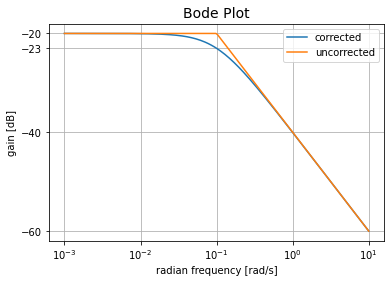

In [3]:
# Create the radian frequency domain at the logarithmic scale.
x = np.linspace(0, 4, num=200)
omega = 10**(x-3)

# Define the functions that give the (un)corrected Bode plot(s).
K_dB = -20-10*log(1+100*omega**2)
f = [-20 if x_i <= 2 else 20 - 20*x_i for x_i in x]

# Create the figure and axes objects.
fig, ax = plt.subplots()
ax.set_title('Bode Plot', size=14)
ax.set_xlabel('radian frequency [rad/s]')
ax.set_ylabel('gain [dB]')

ax.set_xticks([0,1,2,3,4], [r'$10^{' + str(i - 3) + r'}$' for i in range(5)])
ax.set_yticks([-20, -23, -40, -60])
ax.grid()

# Plot the data.
ax.plot(x, K_dB, label='corrected')
ax.plot(x, f, label='uncorrected')
ax.legend()

In the **case of B**:  

$$ K(j\omega) = \frac{1 + j0.1\omega}{j\omega} = 0.1-j\frac{1}{\omega} = \frac{0.1\omega - j}{\omega}$$

$$ K(\omega) = \sqrt{0.01 + \frac{1}{\omega^2}}\quad\implies\quad K_\mathrm{dB}(\omega) = 10\log\left(0.01+ \frac{1}{\omega^2}\right)$$

$$ K_\mathrm{dB}(\omega) = 10\log\frac{\omega^2 + 100}{100\omega^2} = 10\log\big(\omega^2+100\big) -20\log(10\omega) = 10\log\big(\omega^2+100\big) - 20 - 20\log\omega$$

$$  = 10\log\Big(100\big((0.1\omega)^2 + 1\big)\Big) - 20 - 20\log\omega$$

The gain, in decibels, is given by:  

$$ K_\mathrm{dB}(\omega) = 10\log\big((0.1\omega)^2+1\big) - 20\log\omega$$

The cutoff frequency is given by:  

$$ \omega_\mathrm{c} = 10\,\mathrm{rad}/\mathrm{s}$$

The radian frequency $\omega$ as a function of one interval on the the $\omega$-axis  at the logarithmic scale is given by:  

$$ \omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^{x-1}$$

Finally, the *uncorrected* Bode plot is given by $f(x)$, where,  

$$ f(x) = -20(x-1) = 20(1-x) \quad\quad\text{for }\;\omega\le\omega_\mathrm{c}$$

$$ \omega\le\omega_\mathrm{c} \quad\implies\quad x-1\le1 \quad\implies\quad x\le2$$

$$ f(x) = 20\log(0.1\omega) - 20\log\omega = 20\log0.1 = -20\quad\quad\text{for}\;x\ge2$$

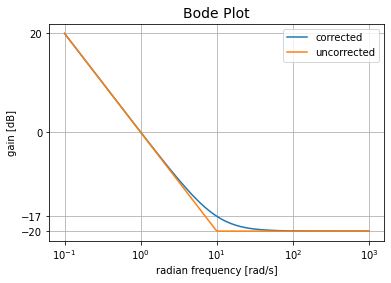

In [4]:
# Create the radian frequency domain at the logarithmic scale.
x = np.linspace(0, 4, num=200)
omega = 10**(x-1)

# Define the functions that give the (un)corrected Bode plot(s).
K_dB = 10*log((0.1*omega)**2 + 1) - 20*log(omega)
f = [20*(1-x_i) if x_i <= 2 else -20 for x_i in x]

# Create the figure and axes objects.
fig, ax = plt.subplots()
ax.set_title('Bode Plot', size=14)
ax.set_xlabel('radian frequency [rad/s]')
ax.set_ylabel('gain [dB]')

ax.set_xticks([0,1,2,3,4], [r'$10^{' + str(i - 1) + r'}$' for i in range(5)])
ax.set_yticks([20, 0, -20, -17])
ax.grid()

# Plot the data.
ax.plot(x, K_dB, label='corrected')
ax.plot(x, f, label='uncorrected')
ax.legend()

In the **case of C**)  $A=0$, $B=10$, $C=1$, $D=10$:  

$$ K(j\omega) = \frac{j10\omega}{1 + j10\omega} \quad\implies\quad K(\omega) = \frac{10\omega}{\sqrt{1 + 100\omega^2}}$$

The gain, in decibels, is given by:  

$$ K_\mathrm{dB}(\omega) = 20\log(10\omega) - 10\log\big(1+100\omega^2\big) = 20 + 20\log\omega - 10\log\big(1+(10\omega)^2\big)$$

The cutoff frequency is:  

$$ \omega_\mathrm{c} = 0.1\,\mathrm{rad}\,\mathrm{s} $$

The radian frequency $\omega$ as a function of one interval on the $\omega$-axis  at the logarithmic scale is given by:  

$$ \omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^{x-3}\,\mathrm{rad}/\mathrm{s}$$

Finally, the *uncorrected* Bode plot is given by:  

$$ f(x) = 20 + 20(x-3) = 20x -40\quad\quad\text{for }\;\omega\le\omega_\mathrm{c}$$

$$ \omega\le\omega_\mathrm{c}\quad\implies\quad x-3\le-1\quad\implies\quad x\le2$$

and,  

$$ f(x) = 20x - 40 - 20\log(10\omega) = 20x - 40 - 20 - 20(x-3) = 0 \quad\quad\text{for }\;x\ge2$$

#### Problem 2
2. Draw the logarithmic plot of the RC high(low)-pass filter, $R=10\mathrm{k}\Omega$, $C=1\mu\mathrm{F}$.

For the **low pass filter**:  

\begin{equation}\tag{3}
    K(j\omega) = \frac{1}{1+j\omega T}\quad\quad\text{where }\;T = RC
\end{equation}

And,  

$$ K(\omega) = \frac{1}{\sqrt{1+(\omega T)^2}} \quad\implies\quad K_\mathrm{dB}(\omega) = -10\log\big(1+(\omega T)^2\big)$$

The cutoff or half-power frequency is:  

$$ \omega_\mathrm{c} = \frac{1}{T} = \frac{1}{RC} = \frac{1}{10\mathrm{m}[\Omega\cdot\mathrm{F}]} = 100\,\mathrm{rad}/\mathrm{s}$$

The radian frequency $\omega$ as a function of one interval on the $\omega$-axis at the logarithmic scale is given by:  

$$\omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^x\,\mathrm{rad}/\mathrm{s}$$

The *uncorrected* Bode plot is given by:  

$$ f(x) = 0 \quad\quad\text{for }\;\omega\le\omega_\mathrm{c}$$

$$ \omega\le\omega_\mathrm{c} \quad\implies\quad x\le2$$

and,  

$$ f(x) = -20\log\big(0.01\omega(x)\big) = 40 - 20x \quad\quad\text{for }\;x\ge2$$

Now, for the **high pass filter**:  

$$ K(j\omega) = \frac{j\omega T}{j\omega T+1} \quad\quad\text{where }\; T=RC = 10\mathrm{ms} = 0.01\mathrm{s}$$

$$ K(\omega) \frac{\omega T}{\sqrt{1+(\omega T)^2}} \quad\implies\quad K_\mathrm{dB}(\omega) = 20\log(\omega T) - 10\log\big(1+(\omega T)^2\big)$$

$$ K_\mathrm{dB}(\omega) = 20\log\omega  - 40 - 10\log\big(1+(\omega T)^2\big)$$

The cutoff frequency is given by:  

$$ \omega_\mathrm{c} = \frac{1}{T} = 100\,\mathrm{rad}/\mathrm{s}$$

The radian frequency $\omega$ as a function of one interval on the $\omega$-axis at the logarithmic scale is given by:  

$$ \omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^x\,\mathrm{rad}/\mathrm{s}$$

Finally, the *uncorrected* Bode plot is given by:  

$$ f(x) = 20x - 40 \quad\quad\text{for }\; x\le2$$

and,  

$$ f(x) = 20x - 40 - 20\log(\omega T) = 0 \quad\quad\text{for }\;x\ge2$$

#### Problem 3
3. Draw the logarithmic plot of the ideal integrator (differentiator) characterized by the integration (differentiation) constant $T=10\mathrm{s}$.

For the ideal **integrator**:  

$$ K(j\omega) = \frac{1}{j\omega T} \quad\implies\quad K(\omega) = \frac{1}{\omega T} \quad\implies\quad K_\mathrm{dB}(\omega) = -20\log(\omega T) = -20-20\log\omega$$

The cutoff or half-power frequency is given by:  

$$ K(\omega_\mathrm{c}) = \frac{1}{\sqrt{2}} \quad\implies\quad \omega_\mathrm{c}T = \sqrt{2}$$

$$ \omega_\mathrm{c} = \frac{\sqrt{2}}{10}\,\left[\frac{\mathrm{rad}}{\mathrm{s}}\right]$$

The radian frequency $\omega$ as a function of one interval on the $\omega$-axis at the logarithmic scale is given by:  

$$ \omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^{x-3}\sqrt{2}\,\mathrm{rad}/\mathrm{s}$$

The bode plot is given by:  

$$ f(x) = -20 - 20(x-3) - 10\log2 = 40 - 20x -10\log2$$

And, for the ideal **differentiator**:  

$$ K(j\omega) = j \omega T \quad\implies\quad K(\omega) = \omega T \quad\implies\quad K_\mathrm{dB}(\omega) = 20\log(\omega T)$$

$$ K_\mathrm{dB}(\omega) = 20 + 20\log\omega$$

$$ \omega_\mathrm{c} = \frac{1}{10\sqrt{2}} = 0.1\sqrt{2}\,\mathrm{rad}/\mathrm{s}$$

$$ \omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^{x-3}\sqrt{2}\,\mathrm{rad}/\mathrm{s} $$

$$ f(x) = 20 + 20(x-3) + 10\log2 = 20x + 10\log2 - 40$$

#### Problem 4
4. What is the simplest structure of a filter giving the following amplitude response?  

![Fig-P.4.5.4](Figures/Fig-P.4.5.4.png)

A two-port element with a capacitor resting on it's only middle branch and a resistor connected in series with a coil both resting on the input side of said two-port element has a frequency response of:  

$$ K(j\omega) = \frac{1}{j\omega C Z(j\omega)} \quad\quad\text{where }\;Z(j\omega) = R + j\omega L + \frac{1}{j\omega C} = R + \frac{1-\omega^2LC}{j\omega C}$$

$$ Z(j\omega) = R + j\,\frac{\omega^2LC - 1}{\omega C}$$

\begin{equation}\tag{4.1}
    K(\omega) = \frac{1}{\omega C Z(\omega)} = \frac{1}{\sqrt{(\omega RC)^2 + \big(\omega^2LC - 1\big)^2}}
\end{equation}

The half-power frequency is given by:  

$$ K(\omega_\mathrm{c}) = \frac{1}{\sqrt{2}} \quad\implies\quad (\omega_\mathrm{c} RC)^2 + \big(\omega_\mathrm{c}^2LC - 1\big)^2 = 2$$

$$ \omega_\mathrm{c}^4(LC)^2 - 2\omega_\mathrm{c}^2LC +1 + \omega_\mathrm{c}^2(RC)^2 =2$$

$$ \omega_\mathrm{c}^4(LC)^2 + \omega_\mathrm{c}^2\big((RC)^2 - 2LC\big) - 1 = 0$$

Via the above equation and the quadratic formula,  

$$ \omega_\mathrm{c}^2 = \frac{2LC-(RC)^2\pm\sqrt{\big((RC)^2-2LC\big)^2 + 4(LC)^2}}{2(LC)^2}$$

The above equation has only one real valued solution,  

$$ \omega_\mathrm{c} = \frac{\sqrt{2LC-(RC)^2+\sqrt{\big((RC)^2-2LC\big)^2 + 4(LC)^2}}}{\sqrt{2}LC}$$

Equation (4.1) gives the curve found in plot a) in figure P.4.5.4.  To verify this, assume that $R=1000\Omega$, $L=1\mathrm{H}$, and $C=1\mu\mathrm{F}$.

In [5]:
R = 1000; L = 1; C = 1e-6
omega_c = sqrt(2*L*C-(R*C)**2 + sqrt(((R*C)**2-2*L*C)**2 + 4*(L*C)**2))/(L*C*sqrt(2))
omega_c

1272.0196495140688

In [6]:
# Create the frequency domain.
omega = np.linspace(0, 2*omega_c, num=200)
f = omega / (2*np.pi)

# Define the gain.
K = 1/sqrt((omega*R*C)**2 + (omega**2*L*C - 1)**2)

In [7]:
(max(K), min(K))

(1.1546762841748524, 0.16571104182871396)

In [8]:
1/sqrt(2)

0.7071067811865475

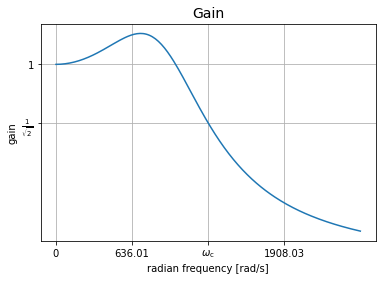

In [9]:
# Create the figure and axes objects.
fig, ax = plt.subplots()
ax.set_title('Gain', size=14)
ax.set_xlabel('radian frequency [rad/s]')
ax.set_ylabel('gain')

ax.set_xticks([0, 0.5*omega_c, omega_c, 1.5*omega_c], ['0', f'{0.5*omega_c:.2f}', r'$\omega_\mathrm{c}$', \
                                                       f'{1.5*omega_c:.2f}'])
ax.set_yticks([0, 1/sqrt(2), 1], ['0', r'$\frac{1}{\sqrt{2}}$', '1'])
ax.grid()

# Plot the data.
ax.plot(omega, K)

A two-port element with a coil resting on the only middle branch and a capacitor resting on the input side of the two-port element will give the amplitude response shown in **plot b)**.  The dashed vertical line is given by the resonant frequency.

A two-port element with a resistor connected in series with a coil both resting on it's only middle branch and a capacitor resting on it's input side will give the amplitude response shown in **plot c)**.  At $\omega=0$, the capacitor is an open-circuit, dropping all of the input voltage, and subsequently allowing no current to pass through the middle branch, implying an output voltage of zero.  As $\omega$ approaches infinity, the voltage dropped across the capacitor approaches zero, leaving all of the input voltage to drop across the output terminals.

#### Problem 5
5. Sketch amplitude response $K(\omega)$ of the given filters.  

![Fig-P.4.5.5](Figures/Fig-P.4.5.5.png)

For **filter a)**:  

$$ K(\omega) = \left|\frac{X_1(\omega)}{X(\omega)}\right|$$

$$ X_1(\omega) = \frac{\omega^2LC-1}{\omega C}\quad\quad\text{and}\quad\quad X(\omega) = \frac{\omega^2LC-2}{\omega C}$$

$$ K(\omega) = \left|\frac{\omega^2LC-1}{\omega^2LC - 2}\right|$$

At $\omega=0$, or, in the case of a DC input signal, both capacitors are open-circuits, each dropping half of the input voltage, implying that $K(0)=0.5$.  As $\omega$ approaches infinity, the capacitors become short-circuits, leaving all of the input voltage to drop across the coil, implying that $K(\infty)=1$.

At resonance, the amplitude response is zero.  

$$ K(\omega_\mathrm{r}) = 0 \quad\implies\quad \omega_\mathrm{r} = \frac{1}{\sqrt{LC}}$$

Furthermore, whereas,  

$$ \omega^2LC - 2 < 0 \quad\implies\quad \omega < \sqrt{\frac{2}{LC}} = \sqrt{2}\omega_\mathrm{r}$$

and,  

$$ \omega^2LC - 1 > 0 \quad\implies\quad \omega > \frac{1}{\sqrt{LC}} = \omega_\mathrm{r}$$

Therefore,  

$$\frac{\omega^2LC-1}{\omega^2LC - 2} < 0 \quad\iff\quad \omega_\mathrm{r} < \omega < \sqrt{2}\omega_\mathrm{r}$$

$$ K\big(\sqrt{2}\omega_\mathrm{r}\big) = \infty$$

The half-power frequency is given by:  

$$ K(\omega_\mathrm{c}) = \frac{1}{\sqrt{2}} \quad\implies\quad \pm\sqrt{2}\big(\omega_\mathrm{c}^2LC-1\big) = \omega_\mathrm{c}^2LC-2$$

$$ \omega_\mathrm{c}^2LC\big(\pm\sqrt{2} - 1\big) = \pm\sqrt{2} - 2$$

$$ \omega_\mathrm{c} = \sqrt{\frac{\sqrt{2}-2}{LC\big(1-\sqrt{2}\big)}}$$

Assuming $L=1\mathrm{H}$ and $C=1\mu\mathrm{F}$,

In [13]:
L = 1; C = 1e-6
omega_r = 1/sqrt(L*C)

In [23]:
omega_c = sqrt((sqrt(2)-2)/(L*C*(1-sqrt(2))))
omega_c

1189.207115002721

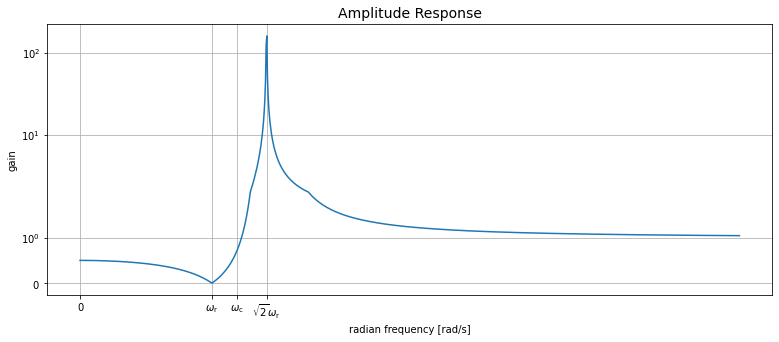

In [27]:
# Create the frequency domain.
omega = np.linspace(0, 5*omega_r, num=1000)

# Define the gain.
K = (omega**2*L*C-1)/(omega**2*L*C-2)

fig, ax = plt.subplots(figsize=(13, 5))
ax.set_title('Amplitude Response', size=14)
ax.set_xlabel('radian frequency [rad/s]')
ax.set_ylabel('gain')

ax.set_xticks([0, omega_r, omega_c, sqrt(2)*omega_r], \
              ['0', r'$\omega_\mathrm{r}$', r'$\omega_\mathrm{c}$', r'$\sqrt{2}\omega_\mathrm{r}$'])
ax.set_yticks([0, 1/sqrt(2), 1, 10, 10**2], ['0', r'$1/\sqrt{2}$', '1', '10', r'$10^2$'])
ax.set_yscale('symlog')
ax.grid()

ax.plot(omega, abs(K))

For **filter b)**:  

$$ K(\omega) = \frac{|X_1(\omega)|}{|X(\omega)|} \quad\quad\text{where }\;X_1(\omega) = \omega L - \frac{1}{\omega C} = \frac{\omega^2LC-1}{\omega C}$$

and,  

$$ X(\omega) = 2\omega L - \frac{1}{\omega C} = \frac{2\omega^2LC - 1}{\omega C}$$

Or,    

$$ K(\omega) = \left|\frac{\omega^2LC-1}{2\omega^2LC-1}\right| $$

At $\omega=0$, or, when the input signal is a DC signal, the capacitor is an open-circuit, and thus, all of the input voltage is dropped across the output terminals, implying that $K(0) = 1$.  As $\omega$ approaches infinity, the capacitor becomes a short-circuit and the two coils each drop half of the input voltage, implying that $K(\infty) = 0.5$.  At resonance, the gain is zero; Or, to put it another way, $K(\omega_\mathrm{r})=0$.

$$ 2\omega^2LC - 1 = 0 \quad\implies\quad \omega = \frac{1}{\sqrt{2LC}} = \frac{\omega_\mathrm{r}}{\sqrt{2}}$$

Thus,  

$$ K\left(\frac{\omega_\mathrm{r}}{\sqrt{2}}\right) = \infty $$

The half-power or cutoff frequency is given by:  

$$ K(\omega_\mathrm{c}) = \frac{1}{\sqrt{2}} \quad\implies\quad \pm\sqrt{2}\big(\omega_\mathrm{c}^2LC-1\big) = 2\omega_\mathrm{c}^2LC-1$$

$$ \omega_\mathrm{c}^2LC\big(\pm\sqrt{2} - 2\big) = -1 \pm\sqrt{2}$$

$$ \omega_\mathrm{c} = \sqrt{\frac{-1\pm\sqrt{2}}{LC\big(\pm\sqrt{2}-2\big)}} $$

The above equation has only one real valued solution.  


$$ \omega_\mathrm{c} = \sqrt{\frac{1+\sqrt{2}}{LC\big(\sqrt{2}+2\big)}}$$

In [40]:
omega_c = sqrt((1+sqrt(2))/(L*C*(sqrt(2)+2)))
omega_c

840.8964152537145

In [32]:
omega_r/sqrt(2)

707.1067811865474

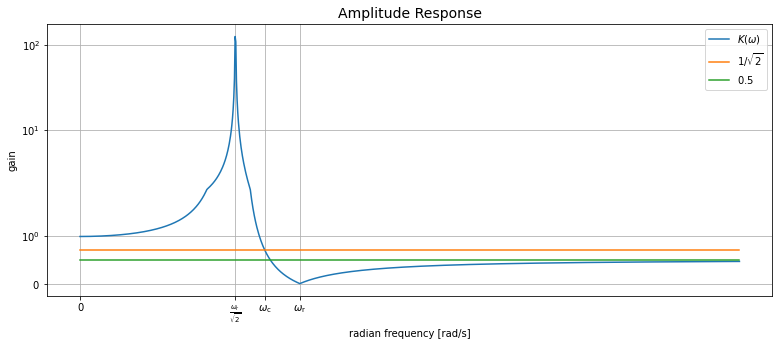

In [41]:
# Create the frequency domain.
omega = np.linspace(0, 3*omega_r, num=1000)

K = abs((omega**2*L*C-1)/(2*omega**2*L*C-1))

fig, ax = plt.subplots(figsize=(13, 5))
ax.set_title('Amplitude Response', size=14)
ax.set_xlabel('radian frequency [rad/s]')
ax.set_ylabel('gain')

ax.set_xticks([0, omega_r/sqrt(2), omega_c, omega_r,], \
              ['0', r'$\frac{\omega_\mathrm{r}}{\sqrt{2}}$', r'$\omega_\mathrm{c}$', r'$\omega_\mathrm{r}$'])
ax.set_yscale('symlog')
ax.grid()

ax.plot(omega, K, label=r'$K(\omega)$')
ax.plot(omega, [1/sqrt(2) for w in omega], label=r'$1/\sqrt{2}$')
ax.plot(omega, [0.5 for w in omega], label=r'$0.5$')
ax.legend()

![Fig-P.4.5.5](Figures/Fig-P.4.5.5.png)

For **filter c)**:  

$$ K(0) = 0 \quad\quad K(\omega_\mathrm{r}) = \infty\quad\quad K(\infty) = 1$$

$$ K(j\omega) = \frac{Z_1(j\omega)}{Z(j\omega)}$$

$$ K(\omega) = \frac{|X_1(\omega)|}{|X(\omega)|}$$

$$ B_1(\omega) = \omega C - \frac{1}{\omega L} = \frac{\omega^2LC - 1}{\omega L} \quad\quad\text{and}\quad\quad X(\omega) = X_1(\omega) - \frac{1}{\omega C}$$

$$ X(\omega) = \frac{\omega L}{\omega^2LC - 1} - \frac{1}{\omega C} = \frac{\omega^2LC - \omega^2LC + 1}{\omega C\big(\omega^2LC-1\big)}  = \frac{1}{\omega C\big(\omega^2LC-1\big)}$$

Thus,  

$$ K(\omega) = \frac{L}{C\big(\omega^2LC-1\big)^2}$$

The half-power frequency is given by:  

$$ K(\omega_\mathrm{c}) = \frac{1}{\sqrt{2}}\quad\implies\quad \sqrt{2}L = C\big(\omega_\mathrm{c}^2LC-1\big)^2$$

$$ \sqrt[4]{2}\sqrt{\frac{L}{C}} = \omega_\mathrm{c}^2LC - 1$$

$$ \omega_\mathrm{c}^2 = \frac{\sqrt[4]{2}}{\sqrt{LC}C} + \frac{1}{LC} = \omega_\mathrm{r}\frac{\sqrt[4]{2}}{C} + \omega_\mathrm{r}^2$$

$$ \omega_\mathrm{c} = \sqrt{\omega_\mathrm{r}\frac{\sqrt[4]{2}}{C} + \omega_\mathrm{r}^2}$$

To find $\omega_\infty$ such that $K(\omega_\infty)=\infty$, we need to solve the following equation:  

$$ $$